In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [8]:
subprocess.run(["g++", "-o", "bar", "bar.cpp", "-lm"])
subprocess.run(["./bar"])

CompletedProcess(args=['./bar'], returncode=0)

In [9]:
df = pd.read_csv("bar_data/joint_positions.csv")
df.head()

time      x0      y0      x1      y1      x2      y2      x3      y3  \
0   0.0 -5.0341  2.6919  0.2316  1.1179  3.4295 -2.3526 -0.5001 -1.1785   
1   0.1 -4.2894  3.7669  0.5910  1.2397  3.4650 -2.5034 -0.5454 -1.6450   
2   0.2 -3.3196  4.6442  1.0048  1.2523  3.5316 -2.7333 -0.5343 -2.1961   
3   0.3 -2.1756  5.2778  1.4414  1.1398  3.6009 -3.0562 -0.4949 -2.8436   
4   0.4 -0.9174  5.6344  1.8656  0.8952  3.6403 -3.4775 -0.4594 -3.5907   

       x4  ...      y45      x46     y46      x47     y47      x48     y48  \
0 -4.0711  ... -10.4886  11.3864 -9.2220  12.5224 -8.7186  13.6601 -8.9991   
1 -4.3139  ...  -9.3060   9.1139 -8.0789  10.2064 -7.4871  11.3741 -7.5844   
2 -4.4000  ...  -7.7421   7.1093 -6.6047   8.1516 -5.9282   9.3199 -5.8398   
3 -4.3549  ...  -5.9869   5.5839 -4.9856   6.5693 -4.2288   7.7090 -3.9569   
4 -4.2111  ...  -4.2474   4.7234 -3.4231   5.6458 -2.5906   6.7282 -2.1421   

       x49      y49  distance  
0  12.4102 -12.4451   17.5753  
1   9.9154 -10.9472   14.7701  
2   7.6578  -9.1069   11.8986  
3   5.8497  -7.1160    9.2117  
4   4.6788  -5.1812    6.9811  

[5 rows x 102 columns]

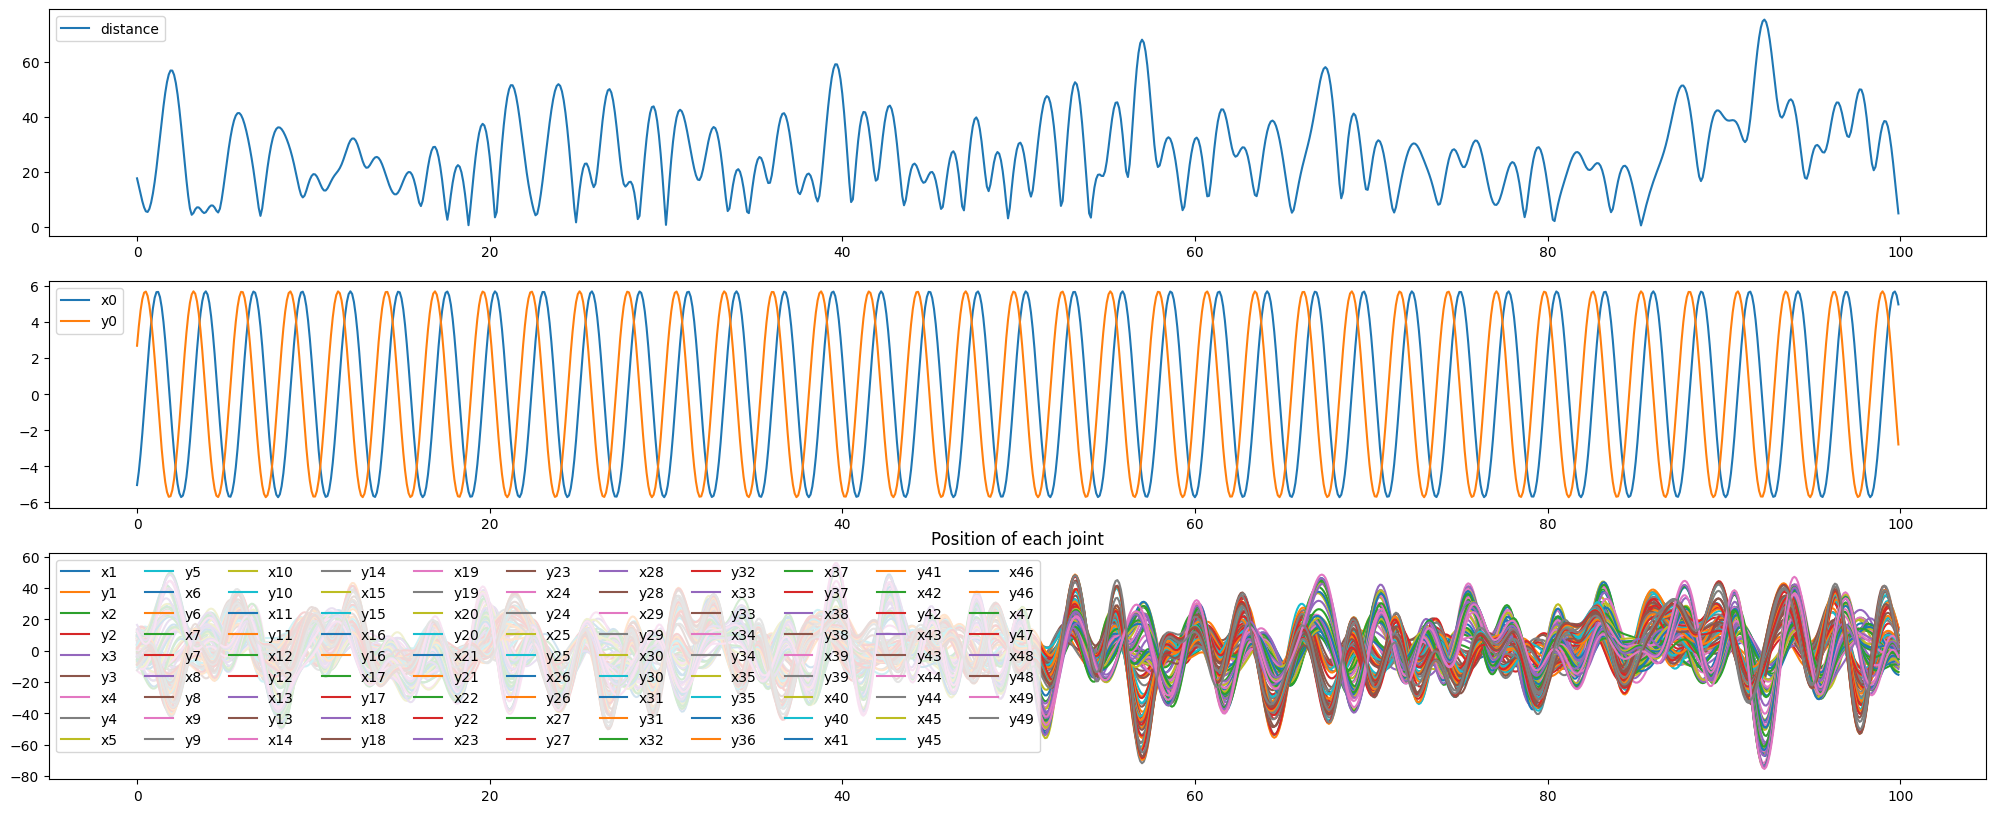

In [10]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=1, nrows=3)
ax1, ax2, ax3 = ax
ax1.plot(df["time"], df["distance"], label = "distance")
ax1.legend(loc = "upper left")
headers = df.columns.tolist()
reference = headers[0]
others = headers[1:-1]
ax2.plot(df[reference], df[others[0]], label = others[0])
ax2.plot(df[reference], df[others[1]], label = others[1])
ax2.legend(loc = "upper left")
for header in others[2:]:
    ax3.plot(df[reference], df[header], label=header)
ax3.legend(loc = "upper left", ncol = int(len(headers[1:-1])/10 + 1))
plt.title("Position of each joint")
plt.show()

In [11]:
distance = pd.DataFrame()
distance["time"] = df["time"]
# Group x and y together as distance sqrt(x^2 + y^2)

for i in range(int(len(headers[1:-1])/2)):
    data_x = df["x"+str(i)]
    data_y = df["y"+str(i)]
    distance_data = np.sqrt(data_x**2 + data_y**2)
    new_header = "distance"+str(i)
    distance[new_header] = distance_data

distance.head()

time  distance0  distance1  distance2  distance3  distance4  distance5  \
0   0.0   5.708633   1.141639   4.158870   1.280220   4.877065   6.829399   
1   0.1   5.708633   1.373367   4.274721   1.733057   5.011923   7.144288   
2   0.2   5.708620   1.605577   4.465773   2.260162   5.049653   7.391567   
3   0.3   5.708626   1.837601   4.723012   2.886345   5.017938   7.574805   
4   0.4   5.708598   2.069262   5.034361   3.619969   4.958082   7.706865   

   distance6  distance7  distance8  ...  distance40  distance41  distance42  \
0   7.823143   8.970321   7.604967  ...    9.329438    9.443233   11.729489   
1   7.711604   9.092126   8.625930  ...    9.880330    8.872909   10.915723   
2   7.481430   9.067091   9.490832  ...   11.110083    9.302300   10.669591   
3   7.190877   8.953893  10.233829  ...   12.654652   10.494403   11.014895   
4   6.900295   8.811373  10.890698  ...   14.224122   12.024789   11.792387   

   distance43  distance44  distance45  distance46  distance47  distance48  \
0   16.548310   13.073759   15.531213   14.652487   15.258587   16.357938   
1   14.575028   10.466884   13.252416   12.179154   12.658091   13.670891   
2   12.694190    8.064728   10.898753    9.703824   10.079293   10.998354   
3   11.149184    6.323192    8.736455    7.485730    7.812711    8.665203   
4   10.145171    5.716525    7.098535    5.833363    6.211784    7.060968   

   distance49  
0   17.575369  
1   14.770117  
2   11.898636  
3    9.211756  
4    6.981118  

[5 rows x 51 columns]

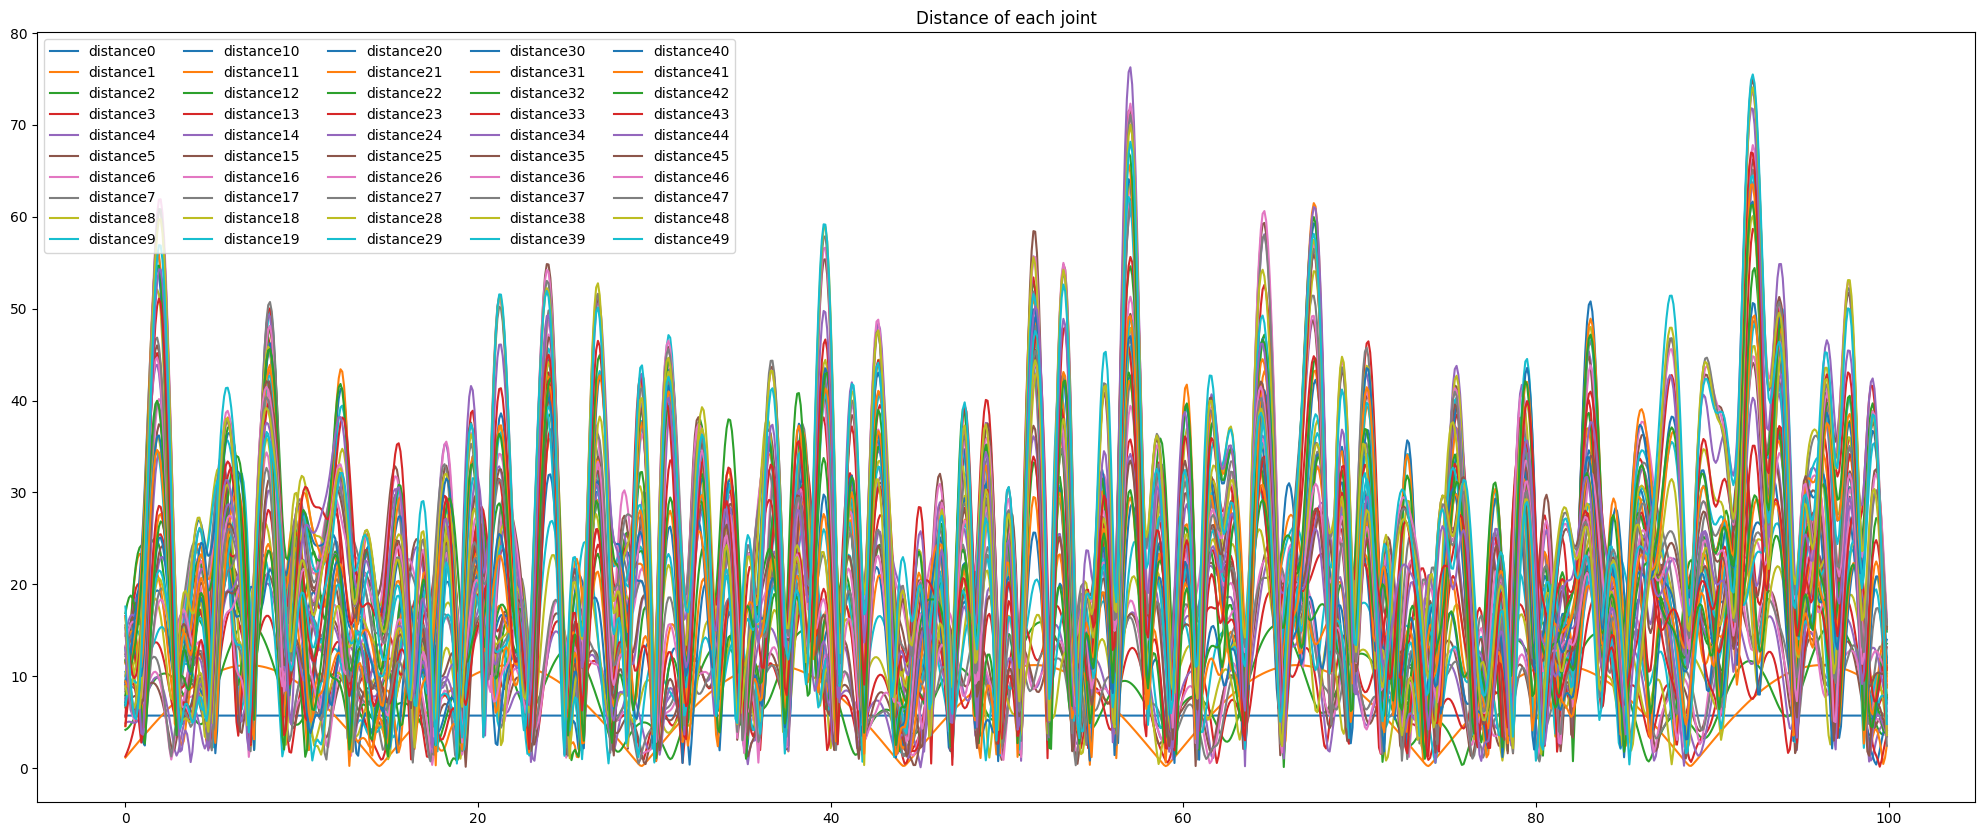

In [12]:
plt.figure(figsize=(25, 10))
headers = distance.columns.tolist()
reference = headers[0]
others = headers[1:]

for header in others:
    plt.plot(distance[reference], distance[header], label=header)
plt.legend(loc = "upper left", ncol = int(len(headers[1:-1])/10 + 1))
plt.title("Distance of each joint")
plt.show()

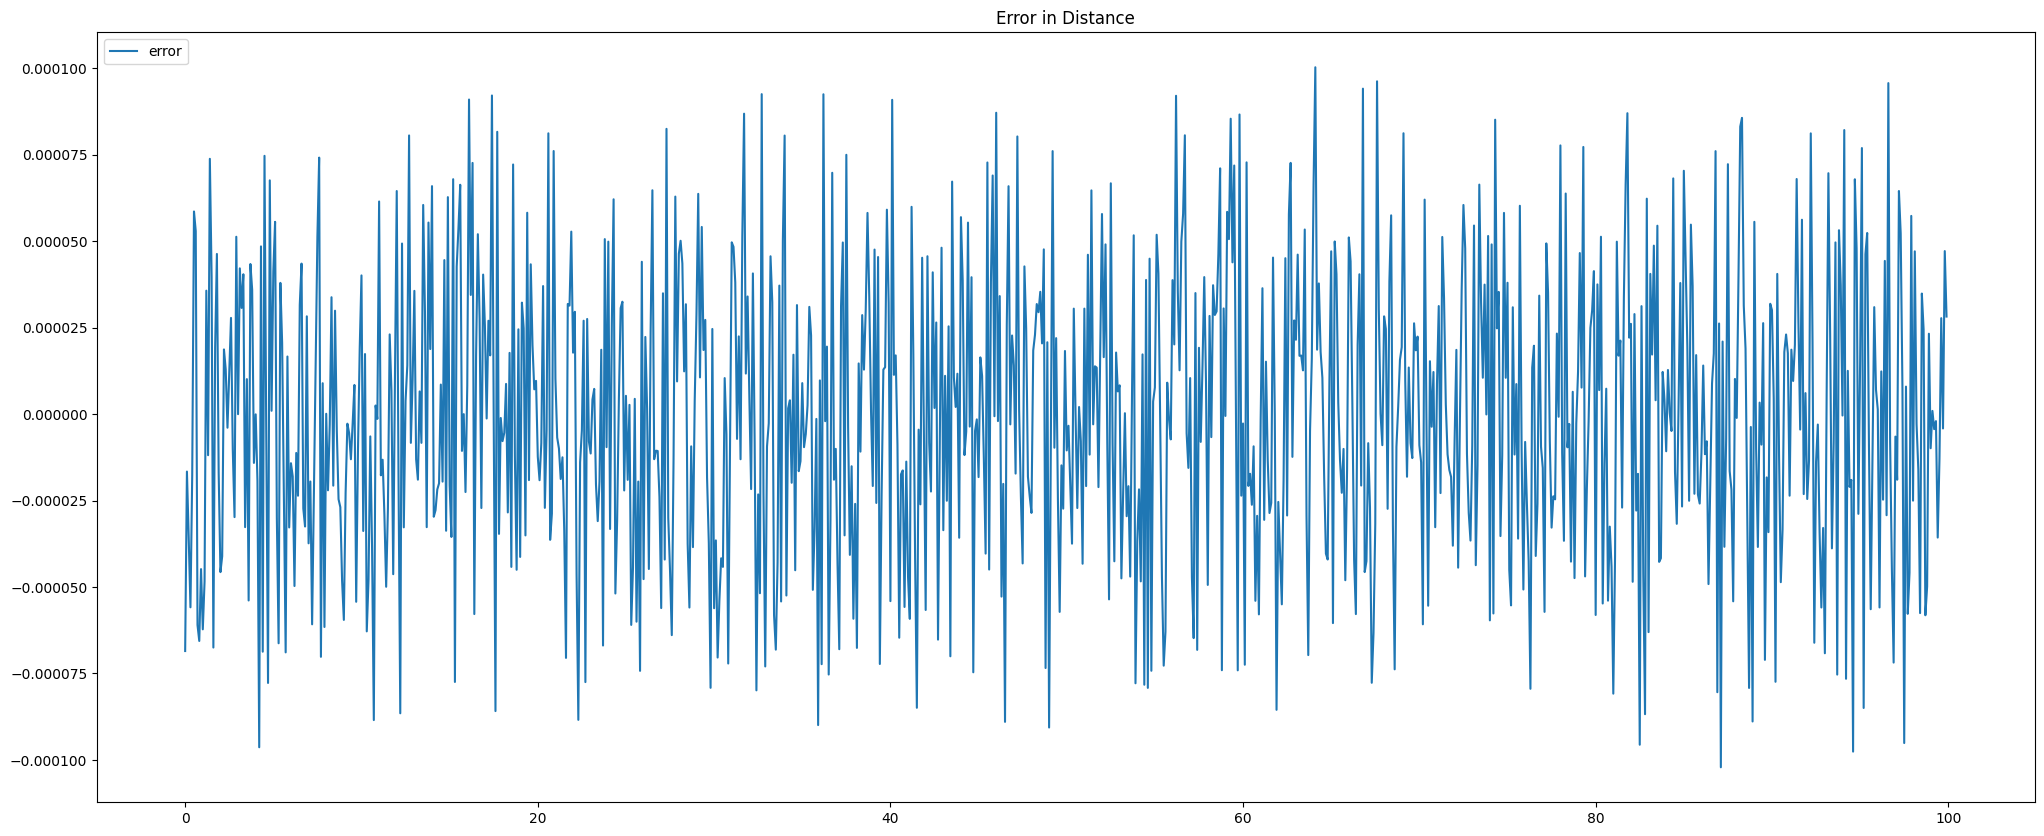

In [13]:
plt.figure(figsize=(25, 10))
plt.plot(df["time"], df.iloc[:, -1] - distance.iloc[:, -1], label="error")
plt.legend(loc = "upper left")
plt.title("Error in Distance")
plt.show()

In [14]:
num_joints = int((len(df.columns) - 2) / 2)  # subtract 'time' and 'distance' column

D1 = pd.DataFrame()
D1["time"] = df["time"]

D1["D1_0"] = np.sqrt(df["x0"]**2 + df["y0"]**2)

for i in range(num_joints - 1):
    dx = df[f"x{i+1}"] - df[f"x{i}"]
    dy = df[f"y{i+1}"] - df[f"y{i}"]
    bar = np.sqrt(dx**2 + dy**2)
    D1[f"D1_{i+1}"] = bar

D1.head()

time      D1_0      D1_1      D1_2      D1_3      D1_4      D1_5      D1_6  \
0   0.0  5.708633  5.495914  4.719209  4.101252  3.875963  2.930033  1.458484   
1   0.1  5.708633  5.495912  4.719181  4.101239  3.875971  2.930055  1.458465   
2   0.2  5.708620  5.495946  4.719081  4.101235  3.875943  2.930046  1.458433   
3   0.3  5.708626  5.495974  4.719095  4.101314  3.875899  2.930003  1.458390   
4   0.4  5.708598  5.495917  4.719117  4.101263  3.875971  2.929983  1.458444   

       D1_7      D1_8  ...     D1_40     D1_41     D1_42     D1_43     D1_44  \
0  2.178563  6.399142  ...  2.866449  2.210442  2.286333  5.801778  4.829684   
1  2.178569  6.399110  ...  2.866476  2.210390  2.286333  5.801756  4.829714   
2  2.178600  6.399070  ...  2.866466  2.210419  2.286406  5.801776  4.829722   
3  2.178611  6.399154  ...  2.866492  2.210435  2.286322  5.801784  4.829790   
4  2.178540  6.399190  ...  2.866503  2.210537  2.286353  5.801745  4.829718   

      D1_45     D1_46     D1_47     D1_48     D1_49  
0  6.389152  1.268435  1.242541  1.171769  3.665674  
1  6.389242  1.268492  1.242491  1.171747  3.665546  
2  6.389173  1.268493  1.242595  1.171640  3.665586  
3  6.389113  1.268454  1.242481  1.171685  3.665639  
4  6.389078  1.268524  1.242529  1.171641  3.665538  

[5 rows x 51 columns]

In [15]:
D1.describe()

time         D1_0         D1_1         D1_2         D1_3  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.950000     5.708644     5.495957     4.719133     4.101232   
std      28.881944     0.000028     0.000041     0.000042     0.000042   
min       0.000000     5.708578     5.495852     4.719015     4.101107   
25%      24.975000     5.708622     5.495926     4.719102     4.101204   
50%      49.950000     5.708644     5.495957     4.719133     4.101233   
75%      74.925000     5.708668     5.495988     4.719162     4.101260   
max      99.900000     5.708710     5.496068     4.719250     4.101336   

              D1_4         D1_5         D1_6         D1_7         D1_8  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      3.875966     2.930028     1.458442     2.178570     6.399143  ...   
std       0.000041     0.000042     0.000040     0.000041     0.000040  ...   
min       3.875856     2.929904     1.458320     2.178455     6.399032  ...   
25%       3.875937     2.929995     1.458415     2.178541     6.399115  ...   
50%       3.875965     2.930028     1.458442     2.178569     6.399143  ...   
75%       3.875995     2.930061     1.458471     2.178599     6.399172  ...   
max       3.876093     2.930153     1.458546     2.178697     6.399239  ...   

             D1_40        D1_41        D1_42        D1_43        D1_44  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.866460     2.210442     2.286331     5.801744     4.829725   
std       0.000042     0.000039     0.000041     0.000039     0.000042   
min       2.866358     2.210324     2.286215     5.801626     4.829607   
25%       2.866430     2.210414     2.286303     5.801717     4.829697   
50%       2.866460     2.210440     2.286330     5.801744     4.829725   
75%       2.866489     2.210468     2.286359     5.801772     4.829755   
max       2.866566     2.210555     2.286433     5.801841     4.829830   

             D1_45        D1_46        D1_47        D1_48        D1_49  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      6.389149     1.268487     1.242524     1.171703     3.665599  
std       0.000041     0.000039     0.000040     0.000040     0.000041  
min       6.389047     1.268373     1.242418     1.171600     3.665486  
25%       6.389121     1.268462     1.242496     1.171675     3.665569  
50%       6.389151     1.268488     1.242524     1.171703     3.665600  
75%       6.389179     1.268513     1.242551     1.171731     3.665628  
max       6.389264     1.268591     1.242636     1.171824     3.665717  

[8 rows x 51 columns]

In [16]:
D1.skew()

time    -2.326356e-16
D1_0    -3.192775e-03
D1_1     2.508814e-03
D1_2    -6.450072e-03
D1_3    -4.474267e-02
D1_4     8.915048e-02
D1_5     4.663459e-02
D1_6     1.415984e-03
D1_7     5.591971e-02
D1_8    -3.340542e-02
D1_9    -6.248875e-02
D1_10   -1.096153e-02
D1_11    6.265744e-02
D1_12   -3.729752e-02
D1_13    4.920116e-02
D1_14   -6.445878e-02
D1_15    5.525869e-03
D1_16    2.476223e-02
D1_17    5.036579e-02
D1_18    9.600915e-02
D1_19   -8.122895e-02
D1_20   -7.660640e-02
D1_21    6.295680e-02
D1_22   -8.603205e-02
D1_23    2.718403e-02
D1_24   -9.665001e-04
D1_25    0.000000e+00
D1_26    2.585844e-02
D1_27    2.312168e-03
D1_28    4.701086e-02
D1_29   -1.474236e-02
D1_30    6.523690e-02
D1_31    6.291828e-02
D1_32    0.000000e+00
D1_33   -1.186127e-01
D1_34   -3.733025e-02
D1_35    4.099567e-02
D1_36   -1.693439e-02
D1_37    7.096334e-02
D1_38    3.330036e-02
D1_39   -1.924696e-02
D1_40   -1.943796e-02
D1_41    1.415858e-01
D1_42    7.223136e-03
D1_43   -5.775535e-02
D1_44   -2

In [ ]:
# Plotting
plt.figure(figsize=(25, 10))
for col in D1.columns[1:]:
    plt.plot(D1["time"], D1[col], label=col)

plt.title("Length of Bar at Each Joint")
plt.xlabel("Time")
plt.ylabel("Length")
plt.legend(loc = "upper left", ncols = int((D1.shape[1] - 1)/10 + 1))
plt.grid(True)
# plt.show()
plt.close(fig)

In [18]:
average_length_bar = []
for col in D1.columns[1:]:
    average_length_bar.append(float(D1[col].mean()))
del D1

print("Average length of bar:")
for index, value in enumerate(average_length_bar):
    print(f"Joint {index}: {value}")

Average length of bar:
Joint 0: 5.708644403630467
Joint 1: 5.495956720145986
Joint 2: 4.719133235692092
Joint 3: 4.101232060157877
Joint 4: 3.875965869866063
Joint 5: 2.930028479479298
Joint 6: 1.458442413422723
Joint 7: 2.1785695971201395
Joint 8: 6.399143081381919
Joint 9: 5.17994493221578
Joint 10: 5.85718285083583
Joint 11: 3.8816959312619317
Joint 12: 3.7599138978976643
Joint 13: 5.580193204134073
Joint 14: 5.625172824143575
Joint 15: 1.262362412264114
Joint 16: 6.178583719089874
Joint 17: 3.002289937984611
Joint 18: 3.7123579487442577
Joint 19: 1.3655692483964634
Joint 20: 3.7045523052842064
Joint 21: 2.5726570313356434
Joint 22: 1.836075657325631
Joint 23: 6.212682073570493
Joint 24: 5.8143084774332605
Joint 25: 3.8884163378722243
Joint 26: 2.805942497343797
Joint 27: 4.848501011161917
Joint 28: 3.740945197789395
Joint 29: 4.018216621877902
Joint 30: 3.870647081603612
Joint 31: 2.351145548397744
Joint 32: 6.171695413063131
Joint 33: 5.410468911841701
Joint 34: 5.531278525222182


In [19]:
D2 = pd.DataFrame()
D2["time"] = df["time"]

D2["angle0"] = np.arctan2(df["y0"] , df["x0"])
for i in range(num_joints - 1):
    dx = df[f"x{i+1}"] - df[f"x{i}"]
    dy = df[f"y{i+1}"] - df[f"y{i}"]
    distance = np.sqrt(dx**2 + dy**2)
    D2[f"angle{i+1}"] = np.arctan2(dy, dx)

D2.head()

time    angle0    angle1    angle2    angle3    angle4    angle5    angle6  \
0   0.0  2.650546 -0.290462 -0.826255  2.851252 -2.742257 -1.510453 -1.280837   
1   0.1  2.420960 -0.477807 -0.915992  2.930731 -2.905556 -1.668081 -1.006434   
2   0.2  2.191376 -0.665133 -1.005764  3.010230 -3.068875 -1.825659 -0.732040   
3   0.3  1.961790 -0.852480 -1.095492  3.089732  3.050986 -1.983244 -0.457668   
4   0.4  1.732201 -1.039820 -1.185249 -3.113988  2.887685 -2.140832 -0.183343   

     angle7    angle8  ...   angle40   angle41   angle42   angle43   angle44  \
0  3.120981  1.872502  ... -1.124592 -1.263510  0.129124 -0.580368 -2.577252   
1 -3.078252  1.985343  ... -0.993795 -1.552020 -0.136714 -0.801182 -2.761713   
2 -2.994269  2.098182  ... -0.862984 -1.840520 -0.402486 -1.022032 -2.946179   
3 -2.910307  2.211041  ... -0.732214 -2.129007 -0.668286 -1.242859 -3.130640   
4 -2.826374  2.323890  ... -0.601375 -2.417490 -0.934118 -1.463693  2.968084   

    angle45   angle46   angle47   angle48   angle49  
0 -1.717950  1.624589  0.417129 -0.241729 -1.918749  
1 -1.666179  1.826960  0.496443 -0.083134 -1.980076  
2 -1.614400  2.029438  0.575704  0.075522 -2.041410  
3 -1.562626  2.231784  0.654930  0.234194 -2.102757  
4 -1.510846  2.434258  0.734215  0.392821 -2.164095  

[5 rows x 51 columns]

In [20]:
# Compare angles with real data
angle_data = pd.read_csv("bar_data/joint_angles.csv")
angle_data.head()

time  angle0  angle1  angle2  angle3  angle4  angle5  angle6  angle7  \
0   0.0  2.6505 -0.2905 -0.8263  2.8512 -2.7422 -1.5105 -1.2808  3.1210   
1   0.1  2.4210 -0.4778 -0.9160  2.9307 -2.9056 -1.6681 -1.0065 -3.0782   
2   0.2  2.1914 -0.6651 -1.0058  3.0102 -3.0689 -1.8257 -0.7321 -2.9943   
3   0.3  1.9618 -0.8525 -1.0955  3.0897  3.0510 -1.9832 -0.4577 -2.9103   
4   0.4  1.7322 -1.0398 -1.1853 -3.1140  2.8877 -2.1408 -0.1833 -2.8264   

   angle8  ...  angle41  angle42  angle43  angle44  angle45  angle46  angle47  \
0  1.8725  ...  -1.2635   0.1291  -0.5804  -2.5772  -1.7179   1.6245   0.4171   
1  1.9853  ...  -1.5520  -0.1367  -0.8012  -2.7617  -1.6662   1.8270   0.4964   
2  2.0982  ...  -1.8405  -0.4025  -1.0220  -2.9462  -1.6144   2.0294   0.5757   
3  2.2110  ...  -2.1290  -0.6683  -1.2429  -3.1306  -1.5626   2.2318   0.6550   
4  2.3239  ...  -2.4175  -0.9341  -1.4637   2.9681  -1.5109   2.4342   0.7343   

   angle48  angle49  distance  
0  -0.2418  -1.9187   17.5753  
1  -0.0831  -1.9801   14.7701  
2   0.0755  -2.0414   11.8986  
3   0.2341  -2.1028    9.2117  
4   0.3928  -2.1641    6.9811  

[5 rows x 52 columns]

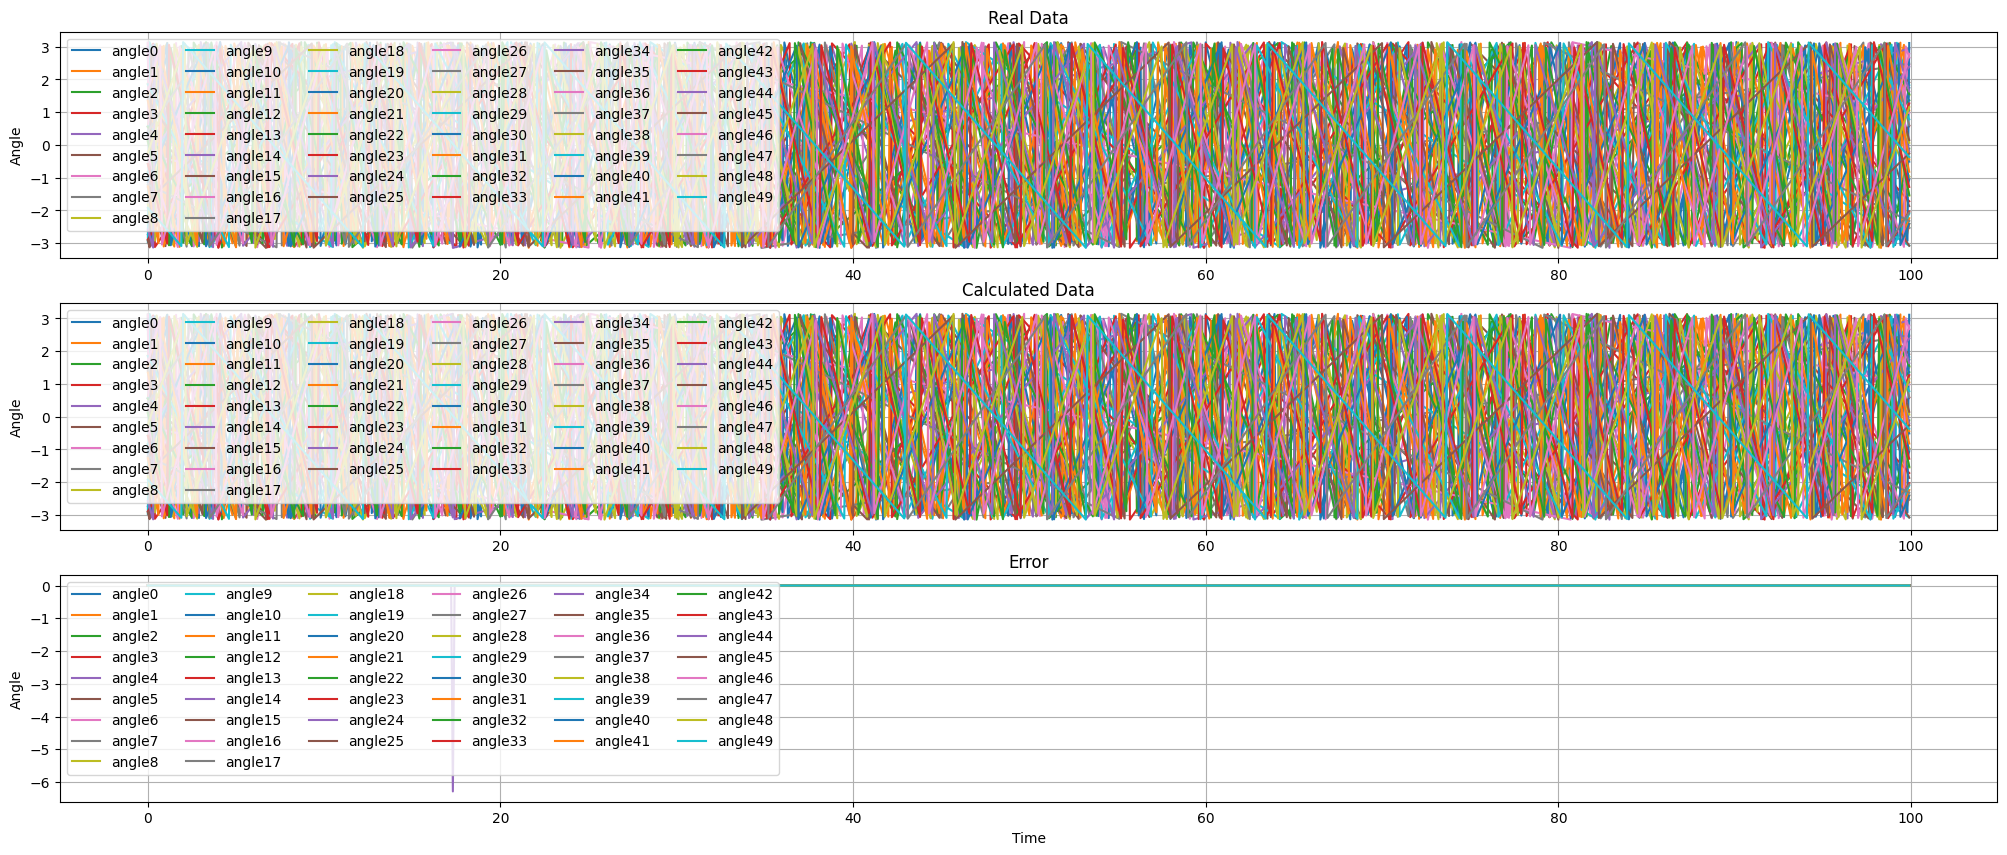

In [21]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=1, nrows=3)
ax1, ax2, ax3 = ax

for i in range(num_joints):
    ax1.plot(angle_data["time"], angle_data[f"angle{i}"], label = f"angle{i}")
    ax1.legend(loc = "upper left", ncols = int(num_joints/10 + 1))
    ax2.plot(D2["time"], D2[f"angle{i}"], label = f"angle{i}")
    ax2.legend(loc = "upper left", ncols = int(num_joints/10 + 1))
    ax3.plot(angle_data["time"], angle_data[f"angle{i}"] - D2[f"angle{i}"], label = f"angle{i}")
    ax3.legend(loc = "upper left", ncols = int(num_joints/10 + 1))

ax1.set_title("Real Data")
ax1.set_ylabel("Angle")
ax1.grid(True)

ax2.set_title("Calculated Data")
ax2.set_ylabel("Angle")
ax2.grid(True)

ax3.set_title("Error")
ax3.set_ylabel("Angle")
ax3.grid(True)

plt.xlabel("Time")
plt.show()

In [22]:
# Rebuild the model
reconstruct = pd.DataFrame()

reconstruct["time"] = df["time"]

for row in D2.index:
    x = 0
    y = 0
    for i in range(num_joints):
        x += average_length_bar[i] * np.cos(D2[f"angle{i}"][row])
        y += average_length_bar[i] * np.sin(D2[f"angle{i}"][row])
    reconstruct.loc[row, "x"] = x
    reconstruct.loc[row, "y"] = y
    reconstruct.loc[row, "distance"] = np.sqrt(x**2 + y**2)

reconstruct["x error"] = reconstruct["x"] - df[f"x{len(average_length_bar)-1}"]
reconstruct["y error"] = reconstruct["y"] - df[f"y{len(average_length_bar)-1}"]
reconstruct["error distance"] = reconstruct["distance"] - df["distance"]

reconstruct["x error %"] = np.where(
    df[f"x{len(average_length_bar)-1}"] != 0,
    (reconstruct["x error"] / df[f"x{len(average_length_bar)-1}"]) * 100,
    0
)

reconstruct["y error %"] = np.where(
    df[f"y{len(average_length_bar)-1}"] != 0,
    (reconstruct["y error"] / df[f"y{len(average_length_bar)-1}"]) * 100,
    0
)

reconstruct["distance error %"] = np.where(
    df["distance"] != 0,
    (reconstruct["error distance"] / df["distance"]) * 100,
    0
)

reconstruct.head()

time          x          y   distance   x error   y error  error distance  \
0   0.0  12.410124 -12.444928  17.575193 -0.000076  0.000172       -0.000107   
1   0.1   9.915438 -10.947093  14.770062  0.000038  0.000107       -0.000038   
2   0.2   7.657637  -9.106742  11.898410 -0.000163  0.000158       -0.000190   
3   0.3   5.849809  -7.116059   9.211871  0.000109 -0.000059        0.000171   
4   0.4   4.679150  -5.181295   6.981422  0.000350 -0.000095        0.000322   

   x error %  y error %  distance error %  
0  -0.000613  -0.001383         -0.000609  
1   0.000379  -0.000978         -0.000254  
2  -0.002130  -0.001735         -0.001599  
3   0.001865   0.000827          0.001852  
4   0.007470   0.001831          0.004616

In [23]:
reconstruct.describe()

time            x            y     distance      x error  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.950000     0.187591     0.834631    26.114573     0.000002   
std      28.881944    21.007251    20.735597    13.760398     0.000142   
min       0.000000   -75.489902   -64.917634     0.395372    -0.000460   
25%      24.975000   -14.219752   -13.580304    16.214855    -0.000096   
50%      49.950000     0.463026     2.722423    24.330993    -0.000001   
75%      74.925000    13.752800    14.707197    35.436536     0.000100   
max      99.900000    55.925977    48.133257    75.490880     0.000421   

            y error  error distance    x error %    y error %  \
count  1.000000e+03     1000.000000  1000.000000  1000.000000   
mean   6.620267e-07       -0.000003    -0.000164     0.000174   
std    1.446816e-04        0.000148     0.018861     0.019341   
min   -4.799104e-04       -0.000506    -0.348109    -0.291819   
25%   -9.537273e-05       -0.000098    -0.000782    -0.000689   
50%    6.289051e-06       -0.000010    -0.000036    -0.000014   
75%    9.686088e-05        0.000090     0.000639     0.000639   
max    4.314487e-04        0.000505     0.218933     0.472085   

       distance error %  
count       1000.000000  
mean          -0.000017  
std            0.002212  
min           -0.034763  
25%           -0.000425  
50%           -0.000037  
75%            0.000372  
max            0.043461

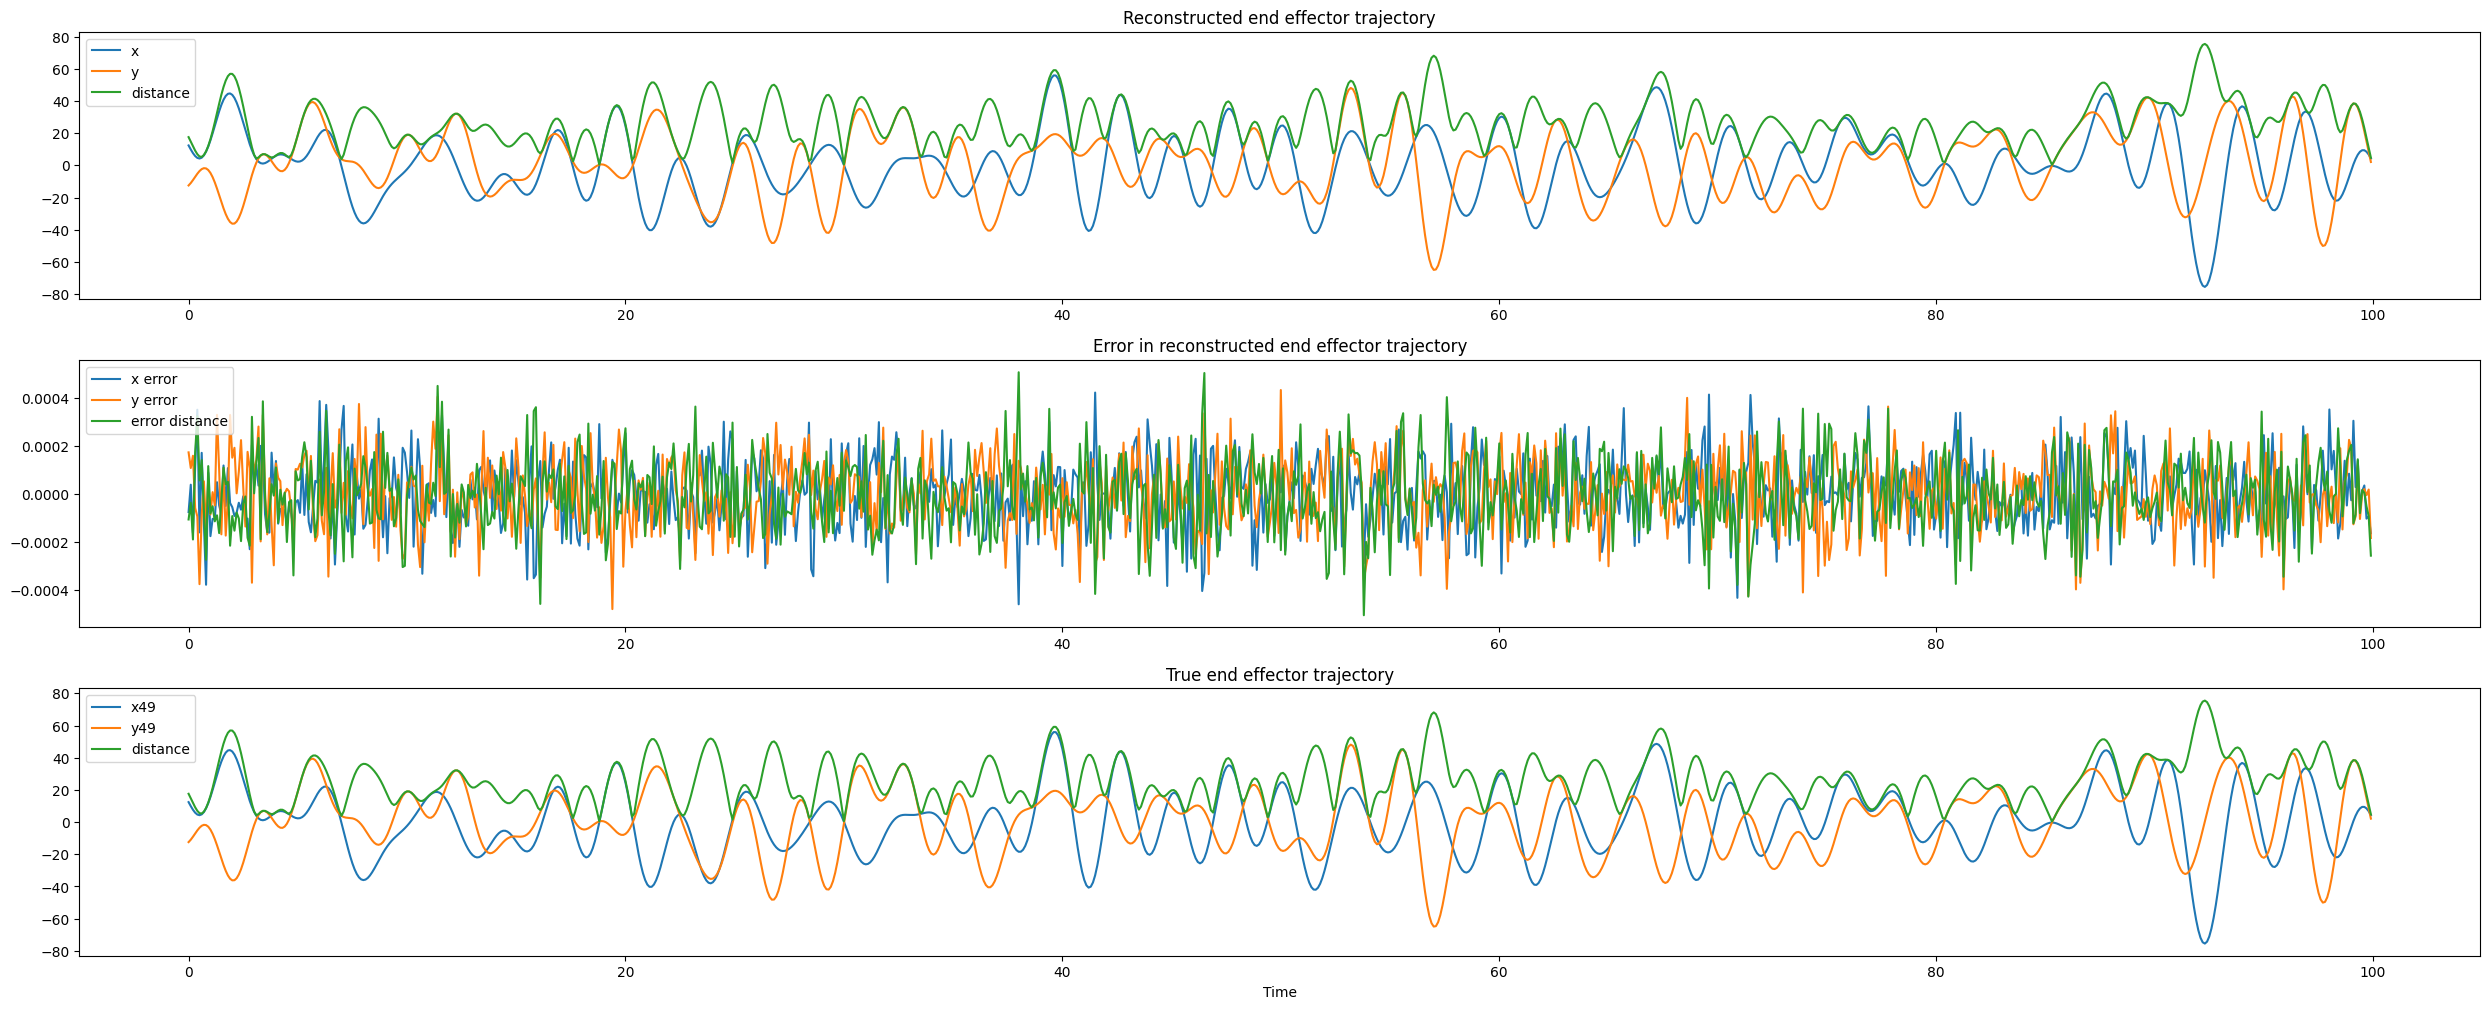

In [24]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=1, nrows=3)
ax1, ax2, ax3 = ax

ax3.plot(df["time"], df[f"x{len(average_length_bar)-1}"], label = f"x{len(average_length_bar)-1}")
ax3.plot(df["time"], df[f"y{len(average_length_bar)-1}"], label = f"y{len(average_length_bar)-1}")
ax3.plot(df["time"], df["distance"], label = "distance")
ax3.legend(loc = "upper left")
ax3.set_title("True end effector trajectory")

others = ["x", "y", "distance"]
for header in others:
    ax1.plot(reconstruct["time"], reconstruct[header], label = header)
ax1.legend(loc = "upper left")
ax1.set_title("Reconstructed end effector trajectory")

error_list = ["x error", "y error", "error distance"]
for header in error_list:
    ax2.plot(reconstruct["time"], reconstruct[header], label = header)
ax2.legend(loc = "upper left")
ax2.set_title("Error in reconstructed end effector trajectory")

fig.tight_layout()
plt.xlabel("Time")
plt.show()

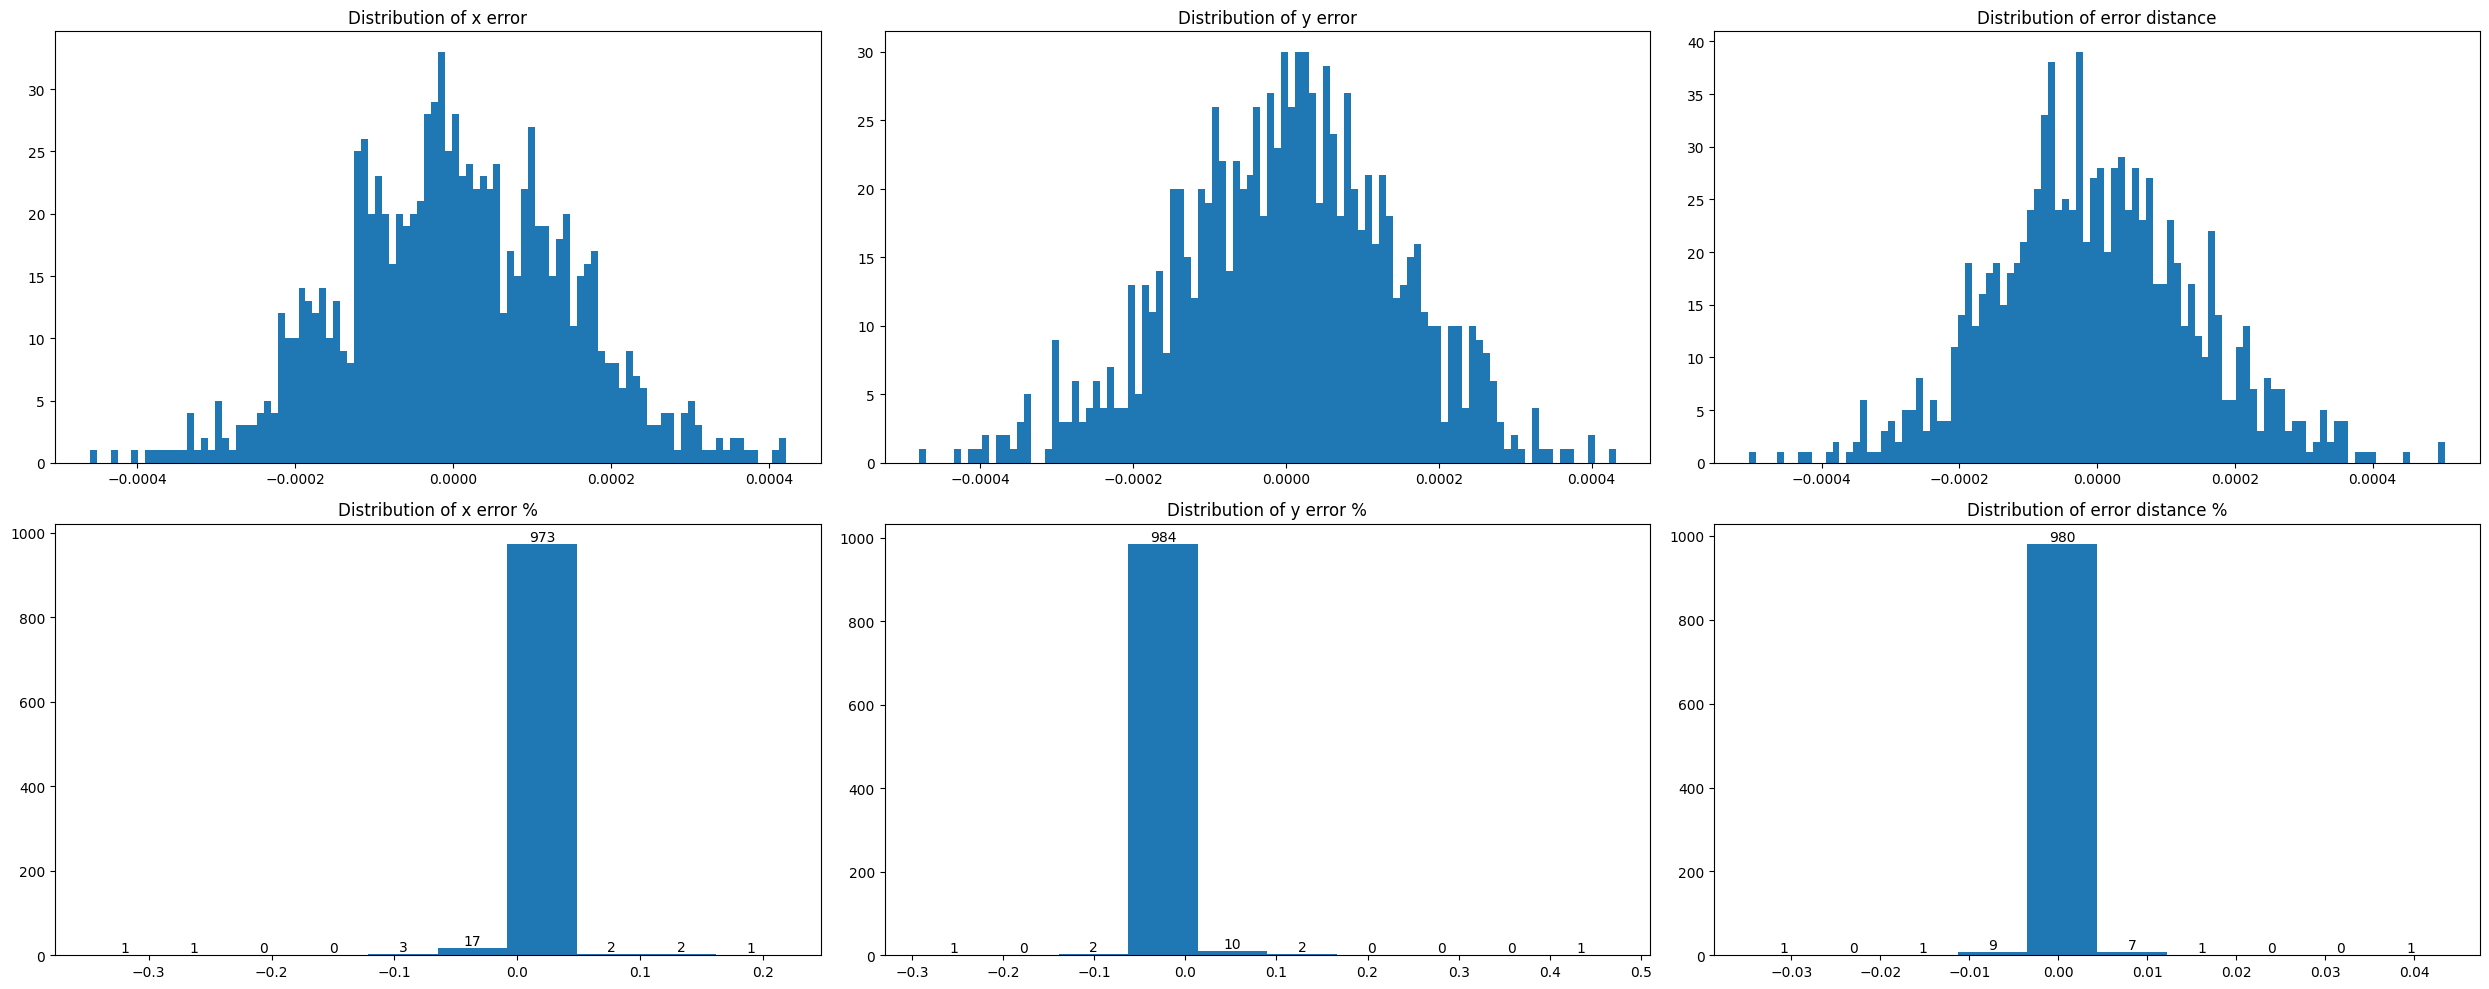

In [25]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=3, nrows=2)

ax1, ax2, ax3 = ax[0]
ax4, ax5, ax6 = ax[1]

# Bar plot for error distribution
ax1.hist(reconstruct["x error"], bins=100)
ax1.set_title("Distribution of x error")

ax2.hist(reconstruct["y error"], bins=100)
ax2.set_title("Distribution of y error")

ax3.hist(reconstruct["error distance"], bins=100)
ax3.set_title("Distribution of error distance")

# Annotated histogram for error %
for axis, col, title in zip(
    [ax4, ax5, ax6],
    ["x error %", "y error %", "distance error %"],
    ["Distribution of x error %", "Distribution of y error %", "Distribution of error distance %"]
):
    n, bins, patches = axis.hist(reconstruct[col], bins=10)
    axis.set_title(title)

    # Annotate each bar with count
    for count, left, right in zip(n, bins[:-1], bins[1:]):
        x = (left + right) / 2
        axis.text(x, count, str(int(count)), ha="center", va="bottom", fontsize=10)

fig.tight_layout()
plt.show()


In [26]:
# Time and signals
t = df["time"].to_numpy()
x = df[f"x{len(average_length_bar)-1}"].to_numpy()
y = df[f"y{len(average_length_bar)-1}"].to_numpy()
distance = df["distance"].to_numpy()

num_samples = len(df)
num_phases = 9  # You can change this to any number of phases you want
samples_per_phase = num_samples // num_phases

# Create phase labels
phases = np.repeat(np.arange(1, num_phases + 1), samples_per_phase)

# Handle leftover samples (if any) by appending the last phase label
if len(phases) < num_samples:
    remaining = num_samples - len(phases)
    phases = np.append(phases, [num_phases] * remaining)

# Add to DataFrame
df["phase"] = phases

In [ ]:
import matplotlib.gridspec as gridspec
from datetime import datetime
import os

def get_time_str(time = datetime.now()):
    time = time.timestamp()
    return datetime.fromtimestamp(time).strftime('%Y_%m_%d_%H_%M_%S_%f')

image_root = "bar_image/"
os.makedirs(image_root, exist_ok=True)

# Define figure and GridSpec with 3 rows and 6 columns (3 left, 3 right)
fig = plt.figure(figsize=(25, 12))
gs = gridspec.GridSpec(3, 6, figure=fig, wspace=0.4, hspace=0.6)

# Phase plots: occupy 3x3 slots on the left (columns 0–2)
phase_axes = [fig.add_subplot(gs[i, j]) for i in range(3) for j in range(3)]
phases = df["phase"].unique()

# Plot each phase into its subplot
for ax, phase in zip(phase_axes, phases):
    mask = df["phase"] == phase
    ax.plot(x[mask], y[mask], label=f"Phase {phase}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Phase {phase}")
    ax.legend(loc = 'upper right')

# Full trajectory plot: occupy all 3 rows of columns 3–5
full_ax = fig.add_subplot(gs[:, 3:6])  # rows all, columns 3 to 5 (inclusive)
for phase in phases:
    mask = df["phase"] == phase
    full_ax.plot(x[mask], y[mask], label=f"Phase {phase}")
full_ax.set_xlabel("x")
full_ax.set_ylabel("y")
full_ax.set_title("Full Trajectory")
full_ax.legend(loc = 'upper right')

plt.tight_layout()
plt.savefig(image_root + "trajectory_" + get_time_str() + ".png")
plt.close(fig)

/tmp/ipykernel_27193/1193034193.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [28]:
csv_file = []
root = "bar_data/"
for file in os.listdir(root):
    if file.endswith(".csv"):
        csv_file.append(file)

# exclude joint_angles.csv and joint_positions.csv
csv_file.remove("joint_angles.csv")
csv_file.remove("joint_positions.csv")

for index, file in enumerate(csv_file, start=1):
    print(f"{index}: {file}")

1: PID1.csv
2: inverted_trajectory_component.csv
3: alternative_kalman2.csv
4: luenberger2.csv
5: alternative_kalman1.csv
6: inverted_trajectory_position.csv
7: kalman2.csv
8: extended_kalman1.csv
9: kalman1.csv
10: PID2.csv
11: luenberger1.csv
12: extended_kalman2.csv
13: LQR1.csv
14: LQR2.csv


In [ ]:
trajectory = pd.DataFrame()
trajectory["time"] = df["time"].astype(float)
trajectory["position"] = df["distance"].astype(float)
inverted_trajectory = pd.read_csv(root + "inverted_trajectory_position.csv")

for file in sorted(csv_file):
    if file.endswith("_component.csv") or file.endswith("_position.csv"):
        continue

    df = pd.read_csv(root + file)
    headers = list(df.columns)[1:]

    has_measured = "measured_position" in headers
    if has_measured:
        headers.remove("measured_position")
    
    # Title formatting
    terms = file.split(".")[0].split("_")
    title = " ".join(terms)
    last_char = title[-1]
    title = title[:-1]
    if not (title == 'PID' or title == 'LQR'):
        title = title.title()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(figsize=(25, 11), ncols=1, nrows=2)

    # Subplot 1: Full trajectory and model estimates
    if last_char == "1":
        ax1.plot(trajectory["time"], trajectory["position"], label="Original Trajectory")
        title += " Original Trajectory"
    elif last_char == "2":
        ax1.plot(inverted_trajectory["time"], inverted_trajectory["position"], label="Reconstructed Trajectory")
        title += " Reconstructed Trajectory"

    for header in headers:
        ax1.plot(df["time"], df[header], label=header)

    ax1.set_xlabel("time")
    ax1.set_title(title + " - Modeling Trajectory")
    ax1.legend(loc="upper left")

    # Subplot 2: Selected signal(s)
    selected_headers = []
    if "PID" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["error", "running"])]
    elif "Kalman" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["predicted_position", "running"])]
    elif "LQR" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["estimated_position"])]
    elif "Luenberger" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["estimated_position"])]

    for header in selected_headers:
        ax2.plot(df["time"], df[header], label=header)

    if last_char == "1":
        ax2.plot(trajectory["time"], trajectory["position"], label="Original Trajectory")
    elif last_char == "2":
        ax2.plot(inverted_trajectory["time"], inverted_trajectory["position"], label="Reconstructed Trajectory")

    ax2.set_xlabel("time")
    ax2.set_title(title + " - Selected Signals")
    ax2.legend(loc="upper left")

    # Layout and show
    plt.tight_layout()
    plt.savefig(image_root + file[:-4] + "_" + get_time_str() + ".png")

    plt.close(fig)